1.读取horseColic.txt数据集，该数据集为从疝气病预测病马的死亡率，最后一列代表是否死亡：1为死亡，0为未死亡

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('horseColic.txt', delimiter='\t') 
print(df.head())

   2.000000  1.000000  38.500000  66.000000  28.000000  3.000000  3.000000.1  \
0       1.0       1.0       39.2       88.0       20.0       0.0         0.0   
1       2.0       1.0       38.3       40.0       24.0       1.0         1.0   
2       1.0       9.0       39.1      164.0       84.0       4.0         1.0   
3       2.0       1.0       37.3      104.0       35.0       0.0         0.0   
4       2.0       1.0        0.0        0.0        0.0       2.0         1.0   

   0.000000  2.000000.1  5.000000  ...  0.000000.1  0.000000.2  0.000000.3  \
0       4.0         1.0       3.0  ...         0.0         0.0         0.0   
1       3.0         1.0       3.0  ...         0.0         0.0         0.0   
2       6.0         2.0       2.0  ...         1.0         2.0         5.0   
3       6.0         2.0       0.0  ...         0.0         0.0         0.0   
4       3.0         1.0       2.0  ...         2.0         1.0         0.0   

   3.000000.2  5.000000.1  45.000000  8.400000  0.

2.对数据划分训练集和测试集，使用逻辑回归、决策树、随机森林三种模型对数据进行分类（有参数的模型可以适当调整）

In [26]:
if df.isnull().sum().sum() > 0:
    df = df.dropna()

    X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
print(lr.predict(X_test))
print(dt.predict(X_test))
print(rf.predict(X_test))

[1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]


3.对训练集和测试集的预测结果，绘制混淆矩阵，并且画出ROC曲线

Model: Logistic Regression


C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


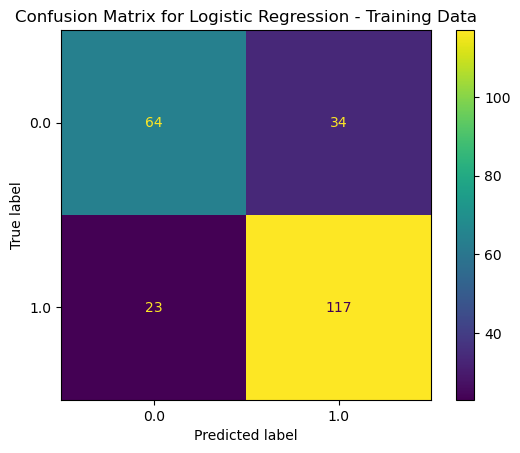

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


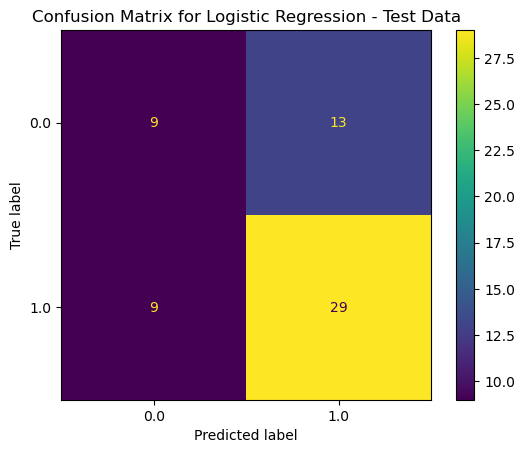

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


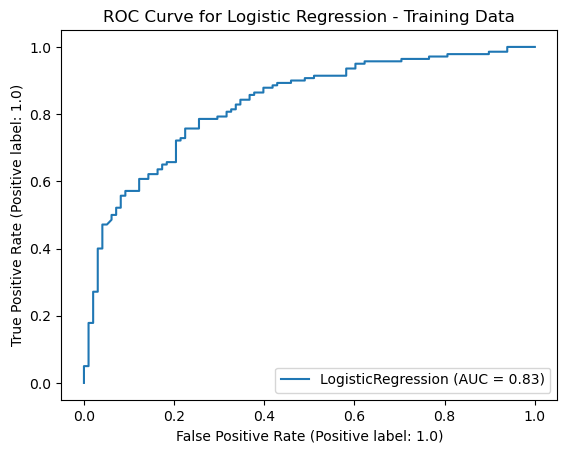

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


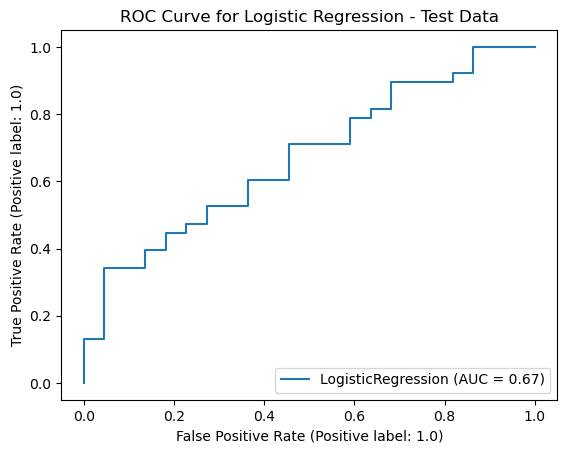

Model: Decision Tree


C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


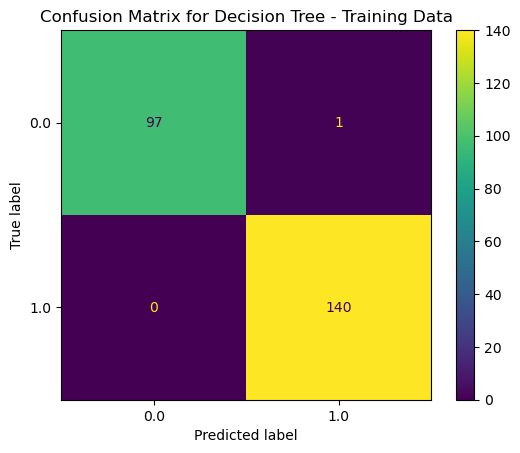

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


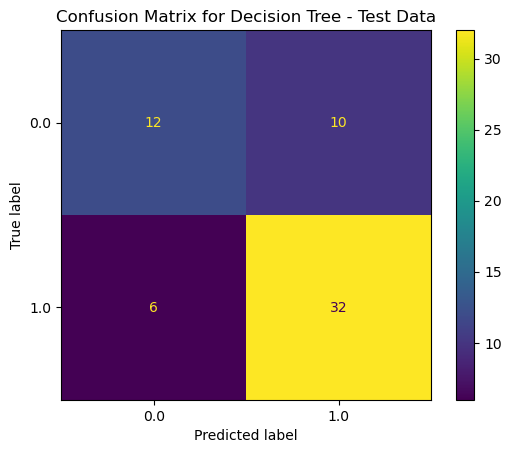

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


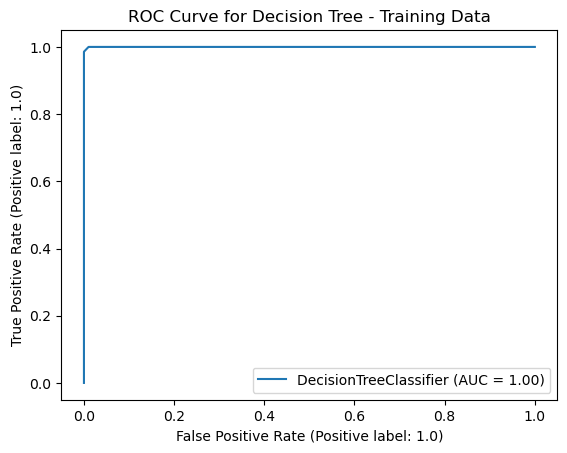

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


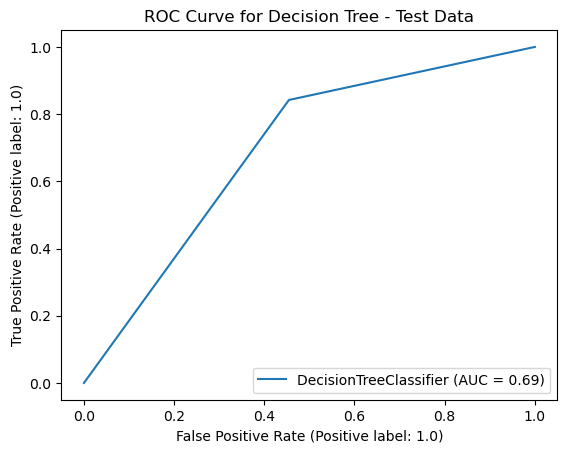

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Model: Random Forest


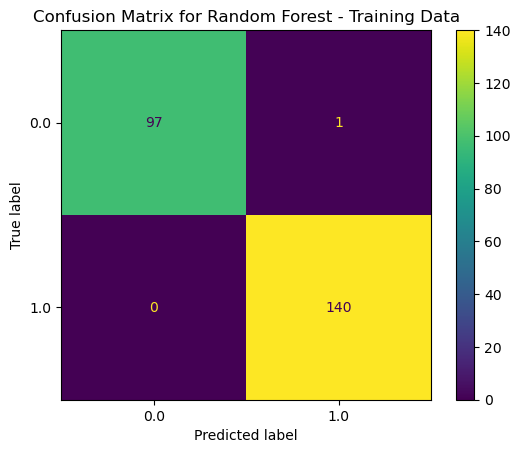

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


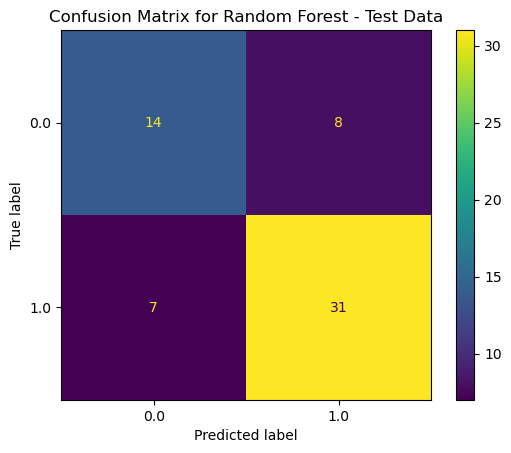

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


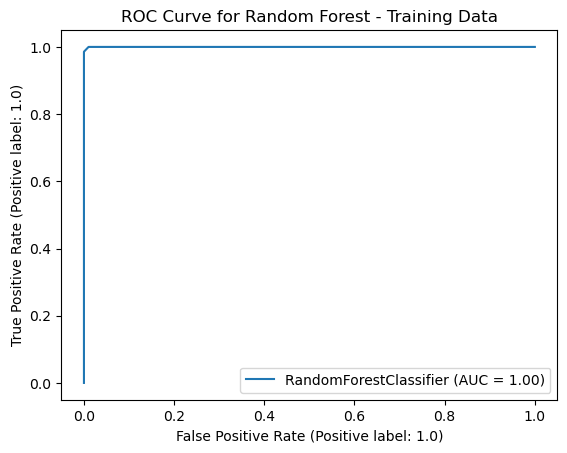

C:\Users\84002\AppData\Local\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


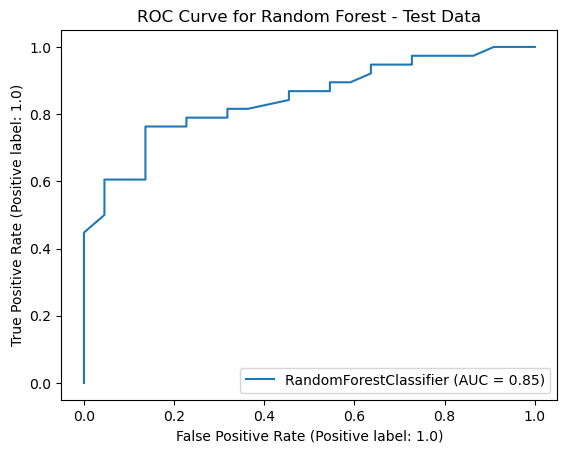

In [32]:
models = [lr, dt, rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, model_names):
    print(f"Model: {name}")
    
    # Plot confusion matrix for training data
    plot_confusion_matrix(model, X_train, y_train)
    plt.title(f'Confusion Matrix for {name} - Training Data')
    plt.show()

    # Plot confusion matrix for test data
    plot_confusion_matrix(model, X_test, y_test)
    plt.title(f'Confusion Matrix for {name} - Test Data')
    plt.show()
    
    # Plot ROC curve for training data
    plot_roc_curve(model, X_train, y_train)
    plt.title(f'ROC Curve for {name} - Training Data')
    plt.show()

    # Plot ROC curve for test data
    plot_roc_curve(model, X_test, y_test)
    plt.title(f'ROC Curve for {name} - Test Data')
    plt.show()


4.根据上述实验结果，撰写实验记录报告，对比多个模型的表现情况并作总结